In [1]:
# --- from Yoshi (Jan 17, 2024)
# (-CO2_dif_exp-CO2_rsp_exp)-(-CO2_dif_spn-CO2_rsp_spn) - 0.14*(CO2_adv_exp - CO2_adv_spn).
# In the above equation CO2_dif denotes face values in the "diff" column for int_flux_gas-pco2.txt file,  
# CO2_adv in the column of "adv", CO2_rsp in the "g2" column (OM phase considered).  
# "exp" denotes ERW experiments while spn controls/spin-ups.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import glob
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# --- 
runtype = "field"   # field or lab
runname_ctrl = ["meanAnn_cao_shortRun_noFert_fixedRate_site_311_app-0_cao_field_tau70p0", "meanAnn_cao_shortRun_noFert_fixedRate_site_411_app-0_cao_field_tau70p0"]
# runname_ctrl = ["meanAnn_dlm_shortRun_noFert_fixedRate_site_311_app-0_dlm_field_tau70p0", "meanAnn_dlm_shortRun_noFert_fixedRate_site_411_app-0_dlm_field_tau70p0"]
# runname_ctrl = ["meanAnn_liming_shortRun_noFert_fixedRate_site_311_app-0_cc_field_tau70p0", "meanAnn_liming_shortRun_noFert_fixedRate_site_411_app-0_cc_field_tau70p0"]
# runname_ctrl = ["meanAnn_basalt_noFert_fixedRate_site_311_app-0p0_cc_field_tau70p0", "meanAnn_basalt_noFert_fixedRate_site_411_app-0p0_cc_field_tau70p0"]
# runname_ctrl = ["liming_noFert_hist_fixedRate_site_311_1950-2020_app-0p0_cc_field_tau70p0", "liming_noFert_hist_fixedRate_site_411_1950-2020_app-0p0_cc_field_tau70p0"]
# runname_ctrl = ["basalt_noFert_hist_fixedRate_site_311_1950-2020_app-0p0_gbas_field_tau70p0", "basalt_noFert_hist_fixedRate_site_411_1950-2020_app-0p0_gbas_field_tau70p0"]
outdir = "/home/tykukla/SCEPTER/scepter_output"

# ---
# set variable file
var_fn = "flx_gas"  # ["flx_gas" or "flx_co2sp"]
# set cdr variable
cdr_var = "pco2"  # if using *flx_co2sp: [DIC, co2g] ; if using *flx_gas: [pco2]

In [30]:
# --- read in the batch .csv 
csv_fn = "meanAnn_cao_shortRun_noFert_fixedRate_v0.csv"
# csv_fn = "meanAnn_dlm_shortRun_noFert_fixedRate_v0.csv"
# csv_fn = "meanAnn_liming_shortRun_noFert_fixedRate_v0.csv"
# csv_fn = "liming_noFert_hist_fixedRate_v0.csv" # "liming_noFert_hist_fixedRate_v0_first20.csv"
# csv_fn = "basalt_noFert_hist_fixedRate_v0.csv" 
csv_loc = "/home/tykukla/aglime-swap-cdr/scepter/batch-inputs"
dfin = pd.read_csv(os.path.join(csv_loc, csv_fn))

# add column for the full run id
dfin["newrun_id_full"] = dfin['newrun_id'] + "_" + dfin['dustsp'] + "_" + runtype + "_tau"+dfin["duration"].astype(float).astype(str).str.replace(".", "p")  # (duration has to be turned into float first because otherwise we miss the decimal pt)
# identify the control run
dfin["ctrl_run"] = dfin['newrun_id_full'].isin(runname_ctrl)

# add a column for the dustrate in ton_ha_yr
if "dustrate" in dfin.columns:
    dfin["dustrate_ton_ha_yr"] = dfin["dustrate"] / 100

In [31]:
dfin

,duration,singlerun_seasonality,cec,dustsp,dustrate,dustrad,add_secondary,spinrun,newrun_id,climatedir,newrun_id_full,ctrl_run,dustrate_ton_ha_yr
0,70,False,21.10329,cao,0,150,True,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,NaN,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,True,0.0
1,70,False,1.96125,cao,0,150,True,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,NaN,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,True,0.0
2,70,False,21.10329,cao,100,150,True,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,NaN,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,False,1.0
3,70,False,1.96125,cao,100,150,True,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,NaN,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,False,1.0
4,70,False,21.10329,cao,1000,150,True,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,NaN,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,False,10.0
5,70,False,1.96125,cao,1000,150,True,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,NaN,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,False,10.0
6,70,False,21.10329,cao,2000,150,True,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,NaN,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,False,20.0
7,70,False,1.96125,cao,2000,150,True,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,NaN,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,False,20.0


In [32]:
# [FOR NOW ONLY LOOK AT THE CONTROL AND ONE OTHER ROW]
# runname_case = "liming_noFert_hist_fixedRate_site_311_1950-2020_app-5p0_cc_field_tau70p0"
# dfin = dfin[(dfin['newrun_id_full'] == runname_case) | (dfin['newrun_id_full'] == runname_ctrl)]
# dfin

In [33]:
# --- FUNCTION to preprocess .txt files for consistent delimiters
def preprocess_txt(file_path):
    data = []  # Initialize a list to store the processed data

    # Initialize a flag to determine if we are reading the header
    is_header = True

    # Read the file line by line and process the data
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if is_header:
                # Split the first line into column names
                column_names = re.split(r'\s+', line)
                is_header = False
            else:
                # Split the other lines into data values
                values = re.split(r'\s+', line)
                data.append(values)

    # Create a DataFrame with the processed data and set column names
    df = pd.DataFrame(data, columns=column_names)
    # return
    return df

In [34]:
# --- read in flux data 
# define file name pattern
df = pd.DataFrame()  # initialize empty df to store dat
fn_pref = [("int_"+var_fn), var_fn] # ["int_flx_co2sp", "flx_co2sp"]   # will read in all species unless fn_varInclude is defined
fn_varInclude = []
varCheck = True if len(fn_varInclude) > 0 else False
fn_ext = ".txt"


# loop through runs
for run in range(len(dfin)):
    tdf = dfin.iloc[run]
    this_path = os.path.join(outdir, tdf['newrun_id_full'])
    flx_path, prof_path = os.path.join(this_path, "flx"), os.path.join(this_path, "prof")

    print("now reading in run " + str(run + 1) + " of " + str(len(dfin)) + "...")
    for fset in fn_pref:
        # set pattern
        fn_pattern = f"{fset}-*{fn_ext}"
        # get list of filenames
        file_paths = glob.glob(f"{flx_path}/{fn_pattern}")
    
        # read in data and concatenate
        for file_path in file_paths:
            # get the variable 
            varpattern = re.escape(fset) + r'-(.*?).txt'
            varmatch = re.search(varpattern, file_path)
            var = varmatch.group(1)
            # skip this step if it's not in the include arr
            if varCheck:
                if var not in fn_varInclude:
                    continue
            # read in
            dfi = preprocess_txt(file_path)
            # apply pd.to_numeric to all columns using the "map" method
            dfi = dfi.map(pd.to_numeric)
            # add set, var, spinrun, ctrl
            dfi["set"] = fset
            dfi["var"] = var
            dfi["spinrun"] = tdf["spinrun"]
            dfi["runname"] = tdf["newrun_id_full"]
            dfi["site"] = re.search(r'site_(\d{3})', tdf['newrun_id_full'])[0]
            dfi["ctrl"] = tdf["ctrl_run"]
            if "dustrate_ton_ha_yr" in tdf.index:
                dfi["dustrate_ton_ha_yr"] = tdf["dustrate_ton_ha_yr"]
            # combine
            df = pd.concat([df, dfi], ignore_index=True)

# drop all time slices dangerously close to zero (these produce astronomical (like 10^10 or higher) residuals)
df = df.loc[df['time'] > 1e-3]

# sort by time and depth
df = df.sort_values(by=["runname", "site", "var", "time"])
df

now reading in run 1 of 8...
now reading in run 2 of 8...
now reading in run 3 of 8...
now reading in run 4 of 8...
now reading in run 5 of 8...
now reading in run 6 of 8...
now reading in run 7 of 8...
now reading in run 8 of 8...


,time,tflx,adv,dif,rain,ka,mgbd,ill,cabd,ct,...,cao,g2,res,set,var,spinrun,runname,site,ctrl,dustrate_ton_ha_yr
1,0.001751,-0.002404,0.577226,23.636809,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-24.211632,-2.461060e-14,int_flx_gas,pco2,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,site_311,True,0.0
65,0.001751,-0.003105,0.577226,23.637510,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-24.211632,-1.076042e-14,flx_gas,pco2,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,site_311,True,0.0
2,0.005834,-0.006411,0.577208,23.640832,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-24.211629,1.305477e-14,int_flx_gas,pco2,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,site_311,True,0.0
66,0.005834,-0.008129,0.577200,23.642557,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-24.211628,2.920630e-14,flx_gas,pco2,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,site_311,True,0.0
3,0.017501,-0.011929,0.577099,23.646448,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-24.211618,1.525189e-14,int_flx_gas,pco2,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,site_311,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0.058334,242.997395,0.111923,-179.848290,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-63.261027,2.206324e-12,flx_gas,pco2,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,site_411,False,20.0
570,0.087501,235.593651,0.198013,-172.530328,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-63.261336,3.363041e-10,int_flx_gas,pco2,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,site_411,False,20.0
578,0.087501,162.657475,0.024837,-99.422854,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-63.259457,-1.583948e-12,flx_gas,pco2,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,site_411,False,20.0
571,0.116667,189.292453,0.148085,-139.399738,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-63.260599,8.425442e-02,int_flx_gas,pco2,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,site_411,False,20.0


In [35]:
# --- calculate CDR 
allsites = df['site'].unique() 

# initialize columns to fill
# define the variable names for saving 
dif_c = "cdr_dif_component"
resp_c = "cdr_resp_component"
adv_c = "cdr_adv_component"
dif = "cdr_dif"
adv = "cdr_adv"

df[dif_c], df[resp_c], df[adv_c], df[dif], df[adv] = -9999., -9999., -9999., -9999., -9999.

# loop through each site
for site in allsites:
    dfsite = df.loc[df['site'] == site]
    # get control run
    dfsite_ctrl = dfsite.loc[dfsite['ctrl'] == True]
    dfsite_notctrl = dfsite.loc[dfsite['ctrl'] == False]

    # loop through non-control runs
    nonctrl_runs = dfsite_notctrl['runname'].unique()
    for trun in nonctrl_runs:
        print(trun)
        # split into case and control
        tdf_case = dfsite_notctrl.loc[(dfsite_notctrl['var'] == cdr_var) & (dfsite_notctrl['runname'] == trun)]
        tdf_ctrl = dfsite_ctrl.loc[(dfsite_ctrl['var'] == cdr_var)]
        # compute cdr 
        # loop through sets
        sets = tdf_case['set'].unique()
        for thisset in sets:
            ttdf_case = tdf_case.loc[tdf_case['set'] == thisset]
            ttdf_ctrl = tdf_ctrl.loc[tdf_ctrl['set'] == thisset]
            
            # if case and control are different lengths, we need to interpolate
            # (this happens sometimes due to shifts in how the timesteps are handled in a given run)
            if len(ttdf_case) != len(tdf_ctrl):
                ctrl_dif = ttdf_ctrl.set_index('time')['dif'].reindex(ttdf_case['time']).interpolate(method='linear').values
                ctrl_resp = ttdf_ctrl.set_index('time')['g2'].reindex(ttdf_case['time']).interpolate(method='linear').values
                ctrl_adv = ttdf_ctrl.set_index('time')['adv'].reindex(ttdf_case['time']).interpolate(method='linear').values
            else:
                ctrl_dif = ttdf_ctrl['dif'].values
                ctrl_resp = ttdf_ctrl['g2'].values
                ctrl_adv = ttdf_ctrl['adv'].values
                
            # get each component
            dif_component = -1*(ttdf_case['dif'].values - ctrl_dif)
            resp_component = -1*(ttdf_case['g2'].values - ctrl_resp)
            adv_component = ttdf_case['adv'].values - ctrl_adv
            
            # compute dif and adv versions
            cdr_dif = dif_component + np.minimum(resp_component, 0)
            cdr_adv = adv_component + np.minimum(resp_component, 0)

            # add back to df
            cond_case = (df["site"] == site) & (df['ctrl'] == False) & (df['runname'] == trun) & (df['set'] == thisset) & (df['var'] == cdr_var)
            df.loc[cond_case, dif_c] = dif_component
            df.loc[cond_case, resp_c] = resp_component
            df.loc[cond_case, adv_c] = adv_component
            df.loc[cond_case, dif] = cdr_dif
            df.loc[cond_case, adv] = cdr_adv

            
df
        

meanAnn_cao_shortRun_noFert_fixedRate_site_311_app-10_cao_field_tau70p0
meanAnn_cao_shortRun_noFert_fixedRate_site_311_app-1_cao_field_tau70p0
meanAnn_cao_shortRun_noFert_fixedRate_site_311_app-20_cao_field_tau70p0
meanAnn_cao_shortRun_noFert_fixedRate_site_411_app-10_cao_field_tau70p0
meanAnn_cao_shortRun_noFert_fixedRate_site_411_app-1_cao_field_tau70p0
meanAnn_cao_shortRun_noFert_fixedRate_site_411_app-20_cao_field_tau70p0


,time,tflx,adv,dif,rain,ka,mgbd,ill,cabd,ct,...,spinrun,runname,site,ctrl,dustrate_ton_ha_yr,cdr_dif_component,cdr_resp_component,cdr_adv_component,cdr_dif,cdr_adv
1,0.001751,-0.002404,0.577226,23.636809,0.0,0.0,0.0,0.0,0.0,0.0,...,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,site_311,True,0.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
65,0.001751,-0.003105,0.577226,23.637510,0.0,0.0,0.0,0.0,0.0,0.0,...,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,site_311,True,0.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
2,0.005834,-0.006411,0.577208,23.640832,0.0,0.0,0.0,0.0,0.0,0.0,...,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,site_311,True,0.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
66,0.005834,-0.008129,0.577200,23.642557,0.0,0.0,0.0,0.0,0.0,0.0,...,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,site_311,True,0.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
3,0.017501,-0.011929,0.577099,23.646448,0.0,0.0,0.0,0.0,0.0,0.0,...,site_311_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_311...,site_311,True,0.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0.058334,242.997395,0.111923,-179.848290,0.0,0.0,0.0,0.0,0.0,0.0,...,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,site_411,False,20.0,242.662575,0.000071,-0.346507,242.662575,-0.346507
570,0.087501,235.593651,0.198013,-172.530328,0.0,0.0,0.0,0.0,0.0,0.0,...,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,site_411,False,20.0,235.404207,0.000239,-0.261496,235.404207,-0.261496
578,0.087501,162.657475,0.024837,-99.422854,0.0,0.0,0.0,0.0,0.0,0.0,...,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,site_411,False,20.0,162.309014,0.000189,-0.430145,162.309014,-0.430145
571,0.116667,189.292453,0.148085,-139.399738,0.0,0.0,0.0,0.0,0.0,0.0,...,site_411_spintuneup,meanAnn_cao_shortRun_noFert_fixedRate_site_411...,site_411,False,20.0,202.273616,-0.000499,-0.311424,202.273118,-0.311923


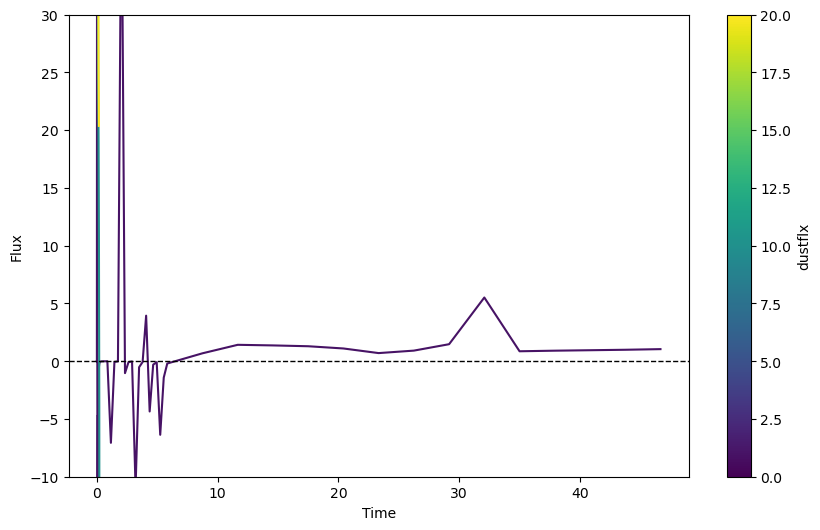

In [41]:
### set site
tsite = "site_311" 

dfint = df.loc[(df["ctrl"] == False) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfx = df.loc[(df["ctrl"] == False) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]

# which to plot
int_on = False
thisdf = dfx
cdvar = "cdr_dif"

# Group by 'iteration'
grouped = thisdf.groupby('dustrate_ton_ha_yr')

# set cmap
norm = Normalize(vmin=df['dustrate_ton_ha_yr'].min(), vmax=df['dustrate_ton_ha_yr'].max())
cmap = plt.get_cmap('viridis')

# Plotting
plt.figure(figsize=(10, 6))
for name, group in grouped:
    if int_on:
        plt.plot(group['time'], group[cdvar]*group['time'], color=cmap(norm(name)))
    else:
        plt.plot(group['time'], group[cdvar], color=cmap(norm(name)))

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Flux')
if cdvar in ["cdr_dif_component", "cdr_dif"]:
    if int_on:
        print("")
        plt.ylim(-80,800)
    else:
        plt.ylim(-10, 30)
# plt.legend()
# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('dustflx')

# Show plot
plt.show()


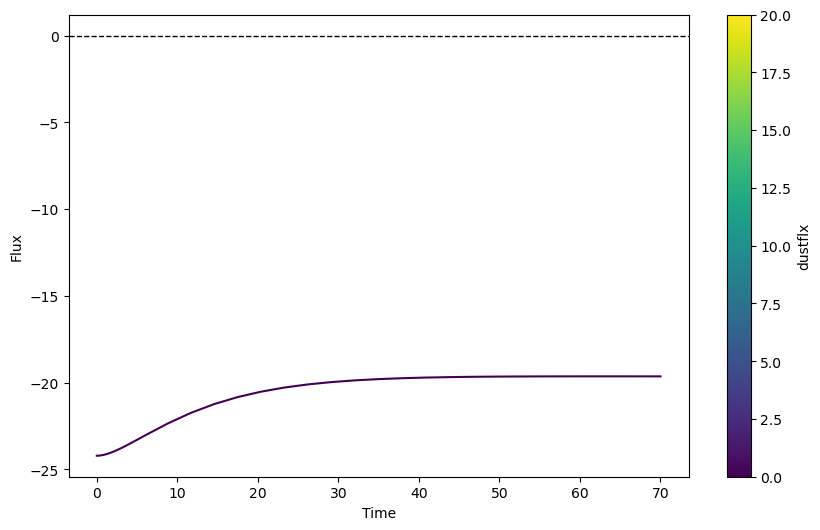

In [54]:
# --- repeat for control

tsite = "site_311" 

thisvar = cdr_var # [cdr_var, "co2g", "g2", "DIC"]

dfintc = df.loc[(df["ctrl"] == True) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfxc = df.loc[(df["ctrl"] == True) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]

# which to plot
thisdf = dfxc
cdvar = "g2"

# Group by 'iteration'
groupedc = thisdf.groupby('dustrate_ton_ha_yr')

# set cmap
norm = Normalize(vmin=df['dustrate_ton_ha_yr'].min(), vmax=df['dustrate_ton_ha_yr'].max())
cmap = plt.get_cmap('viridis')

# Plotting
plt.figure(figsize=(10, 6))
for name, group in groupedc:
    plt.plot(group['time'], group[cdvar], color=cmap(norm(name)))

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Flux')
# plt.ylim(-10, 10)
# plt.legend()

# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('dustflx')

# Show plot
plt.show()

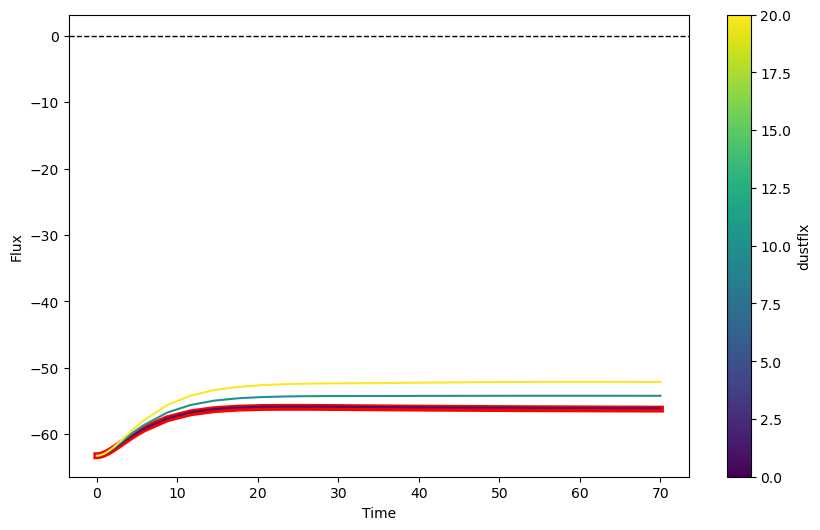

In [55]:
# --- compare control to runs
tsite = "site_411" 

thisvar = cdr_var # [cdr_var, "co2g", "g2", "DIC"]

dfint = df.loc[(df["ctrl"] == False) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfx = df.loc[(df["ctrl"] == False) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]

dfintc = df.loc[(df["ctrl"] == True) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfxc = df.loc[(df["ctrl"] == True) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]


# which to plot
thisdf = "flx" # "flx" or "int"
cdvar = "g2"

# Group by 'iteration'
if thisdf == "flx":
    grouped = dfx.groupby('dustrate_ton_ha_yr')    
    groupedc = dfxc.groupby('dustrate_ton_ha_yr')    
elif thisdf == "int":
    grouped = dfint.groupby('dustrate_ton_ha_yr')    
    groupedc = dfintc.groupby('dustrate_ton_ha_yr')  

# set cmap
norm = Normalize(vmin=df['dustrate_ton_ha_yr'].min(), vmax=df['dustrate_ton_ha_yr'].max())
cmap = plt.get_cmap('viridis')

# Plotting
plt.figure(figsize=(10, 6))
for name, group in groupedc:
    plt.plot(group['time'], group[cdvar], color='red', linewidth=5)

for name, group in grouped:
    plt.plot(group['time'], group[cdvar], color=cmap(norm(name)))

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Flux')
if "dif" in cdvar:
    plt.ylim(0, 70)

# plt.ylim(-10, 10)
# plt.legend()

# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('dustflx')

# Show plot
plt.show()

In [50]:
dfintc

,time,tflx,adv,dif,rain,cc,inrt,g2,amnt,cc,...,spinrun,runname,site,ctrl,dustrate_ton_ha_yr,cdr_dif_component,cdr_resp_component,cdr_adv_component,cdr_dif,cdr_adv


In [35]:
(df.loc[(df["ctrl"] == False) & (df["set"] == "flx_co2sp") & (df["var"] == cdr_var)]['adv'].values == 0).all()

True

In [130]:
cond_case = (df["site"] == site) & (df['ctrl'] == False) & (df['runname'] == trun) & (df['set'] == thisset) & (df['var'] == cdr_var)
cond_case = (df["site"] == site) & (df['ctrl'] == True) & (df['runname'] == trun) & (df['set'] == thisset) & (df['var'] == cdr_var)
df.loc[cond_case, ]

,time,tflx,adv,dif,rain,cc,inrt,g2,amnt,cc,...,gps,mgbd,res,set,var,spinrun,runname,site,ctrl,dustrate_ton_ha_yr
18022,0.001751,-26.147306,0.0,252.877707,0.0,-89.040300,0.0,-24.211632,0.0,-89.040300,...,0.0,0.0,0.003226,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18023,0.005834,-11.630257,0.0,95.320120,0.0,-24.748198,0.0,-24.211628,0.0,-24.748198,...,0.0,0.0,-0.007611,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18024,0.017501,-1.552880,0.0,28.314412,0.0,-0.486782,0.0,-24.211595,0.0,-0.486782,...,0.0,0.0,0.000049,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18025,0.029168,-0.151605,0.0,25.947103,0.0,-0.709718,0.0,-24.211526,0.0,-0.709718,...,0.0,0.0,-0.000090,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18026,0.058334,0.398400,0.0,29.948821,0.0,-3.992403,0.0,-24.211192,0.0,-3.992403,...,0.0,0.0,-0.060320,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18916,69.703812,0.007875,0.0,18.443710,0.0,-0.094742,0.0,-18.579504,0.0,-0.094742,...,0.0,0.0,-0.006481,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18917,69.787173,0.002529,0.0,18.572382,0.0,-0.155717,0.0,-18.580307,0.0,-0.155717,...,0.0,0.0,-0.006670,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18918,69.870534,0.002629,0.0,18.574171,0.0,-0.169927,0.0,-18.581355,0.0,-0.169927,...,0.0,0.0,-0.006667,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18919,69.953895,0.008184,0.0,18.500155,0.0,-0.151181,0.0,-18.582627,0.0,-0.151181,...,0.0,0.0,-0.006619,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0


In [84]:
# --- from Yoshi (Jan 17, 2024)
# (-CO2_dif_exp-CO2_rsp_exp)-(-CO2_dif_spn-CO2_rsp_spn) - 0.14*(CO2_adv_exp - CO2_adv_spn).
# In the above equation CO2_dif denotes face values in the "diff" column for int_flux_gas-pco2.txt file,  
# CO2_adv in the column of "adv", CO2_rsp in the "g2" column (OM phase considered).  
# "exp" denotes ERW experiments while spn controls/spin-ups.

tdf_case = dfsite_notctrl.loc[(dfsite_notctrl['var'] == "co2g")]
tdf_ctrl = dfsite_ctrl.loc[(dfsite_ctrl['var'] == "co2g")]

# subset data
cond_case = dfsite_notctrl['var'] == "co2g"
cond_ctrl = dfsite_ctrl['var'] == "co2g"

# loop through sets
sets = tdf_case['set'].unique()
for thisset in sets:
    ttdf_case = tdf_case.loc[tdf_case['set'] == thisset]
    ttdf_ctrl = tdf_ctrl.loc[tdf_ctrl['set'] == thisset]
    # get each component
    dif_component = -1*(ttdf_case['dif'].values - ttdf_ctrl['dif'].values)
    resp_component = ttdf_case['g2'].values - ttdf_ctrl['g2'].values
    adv_component = ttdf_case['adv'].values - ttdf_ctrl['adv'].values
    
    # compute dif and adv versions
    cdr_dif = dif_component - np.maximum(resp_component, 0)
    cdr_adv = adv_component - np.maximum(resp_component, 0)
    # add back to df (ctrl CDR is zero by definition)
    ttdf_case.loc[:,'cdr_dif_component'], ttdf_ctrl.loc[:,'cdr_dif_component'] = dif_component, 0
    ttdf_case.loc[:,'cdr_resp_component'], ttdf_ctrl.loc[:,'cdr_resp_component'] = resp_component, 0
    ttdf_case.loc[:,'cdr_adv_component'], ttdf_ctrl.loc[:,'cdr_adv_component'] = adv_component, 0
    ttdf_case.loc[:,'cdr_dif'], ttdf_ctrl.loc[:,'cdr_dif'] = cdr_dif, 0
    ttdf_case.loc[:,'cdr_adv'], ttdf_ctrl.loc[:,'cdr_adv'] = cdr_adv, 0

In [105]:
# get each component
dif_component = -1*(ttdf_case['dif'].values - ttdf_ctrl['dif'].values)
resp_component = ttdf_case['g2'].values - ttdf_ctrl['g2'].values
adv_component = ttdf_case['adv'].values - ttdf_ctrl['adv'].values

# compute dif and adv versions
cdr_dif = dif_component - np.maximum(resp_component, 0)
cdr_adv = adv_component - np.maximum(resp_component, 0)

In [108]:
ttdf_case.loc[:,'cdr_dif_component'] = dif_component

In [109]:
# add back to df (ctrl CDR is zero by definition)
ttdf_case.loc[:,'cdr_dif_component'], ttdf_ctrl.loc[:,'cdr_dif_component'] = dif_component, 0
ttdf_case.loc[:,'cdr_resp_component'], ttdf_ctrl.loc[:,'cdr_resp_component'] = resp_component, 0
ttdf_case.loc[:,'cdr_adv_component'], ttdf_ctrl.loc[:,'cdr_adv_component'] = adv_component, 0
ttdf_case.loc[:,'cdr_dif'], ttdf_ctrl.loc[:,'cdr_dif'] = cdr_dif, 0
ttdf_case.loc[:,'cdr_adv'], ttdf_ctrl.loc[:,'cdr_adv'] = cdr_adv, 0


(-10.0, 10.0)

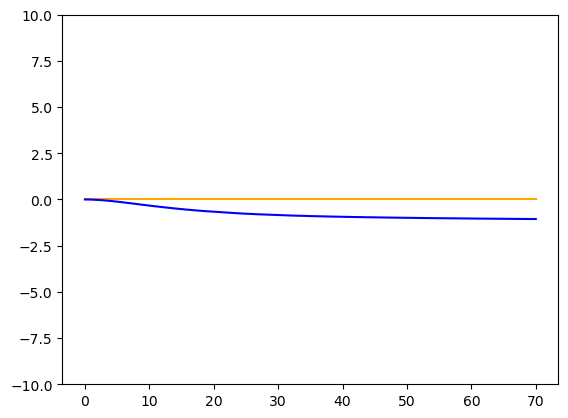

In [117]:
plt.plot(ttdf_case['time'], ttdf_case['cdr_adv_component'], c='orange')
plt.plot(ttdf_case['time'], ttdf_case['cdr_adv'], c='blue')
plt.ylim(-10,10)

In [ ]:
# --- compute the change in CO2 relative to t=0 in diffusion and advection
# create new column
pvars = ["co2g", "DIC"]
flxtype = ["dif", "adv"]  # these align with pvars

# loop through pvars
for tdx in range(len(pvars)):
    thisvar = pvars[tdx]
    thisflx = flxtype[tdx]
    thiscolname = thisflx + "_" + thisvar + "_change"
    df[thiscolname] = 0.  # initialize column
    
    # loop through sets
    for dset in pd.unique(df['set']):
        # subset data
        cond = (df['set'] == dset) & (df['var'] == thisvar)
        dfx = df[cond]
        # get initial flux
        diff_init = dfx.loc[dfx['time'].idxmin(), thisflx]
        # fill in new column
        df.loc[cond, thiscolname] = df.loc[cond, thisflx] - diff_init


In [119]:
cond_case = (dfsite_notctrl['var'] == "co2g") & (dfsite_notctrl['set'] == thisset)
cond_ctrl = (dfsite_ctrl['var'] == "co2g") & (dfsite_ctrl['set'] == thisset)

# get each component
-1*(dfsite_notctrl.loc[cond_case, 'dif'] - dfsite_ctrl.loc[cond_ctrl, 'dif'])

7208    NaN
7209    NaN
7210    NaN
7211    NaN
7212    NaN
         ..
18916   NaN
18917   NaN
18918   NaN
18919   NaN
18920   NaN
Name: dif, Length: 1802, dtype: float64

In [137]:
dfsite = df.loc[df['site'] == "site_411"]
# get control run
dfsite_ctrl = dfsite.loc[dfsite['ctrl'] == True]
dfsite_notctrl = dfsite.loc[dfsite['ctrl'] == False]

# loop through non-control runs
nonctrl_runs = dfsite_notctrl['runname'].unique()
for trun in nonctrl_runs:
    print(trun)
    # split into case and control
    tdf_case = dfsite_notctrl.loc[(dfsite_notctrl['var'] == "co2g") & (dfsite_notctrl['runname'] == trun)]
    tdf_ctrl = dfsite_ctrl.loc[(dfsite_ctrl['var'] == "co2g")]
    # compute cdr 
    # loop through sets
    sets = tdf_case['set'].unique()
    for thisset in sets:
        ttdf_case = tdf_case.loc[tdf_case['set'] == thisset]
        ttdf_ctrl = tdf_ctrl.loc[tdf_ctrl['set'] == thisset]
        
        # if case and control are different lengths, we need to interpolate
        # (this happens sometimes due to shifts in how the timesteps are handled in a given run)
        if len(ttdf_case) != len(tdf_ctrl):
            ctrl_dif = ttdf_ctrl.set_index('time')['dif'].reindex(ttdf_case['time']).interpolate(method='linear').values
            ctrl_resp = ttdf_ctrl.set_index('time')['g2'].reindex(ttdf_case['time']).interpolate(method='linear').values
            ctrl_adv = ttdf_ctrl.set_index('time')['adv'].reindex(ttdf_case['time']).interpolate(method='linear').values
        else:
            ctrl_dif = ttdf_ctrl['dif'].values
            ctrl_resp = ttdf_ctrl['g2'].values
            ctrl_adv = ttdf_ctrl['adv'].values
            
        # get each component
        dif_component = -1*(ttdf_case['dif'].values - ctrl_dif)
        resp_component = ttdf_case['g2'].values - ctrl_resp
        adv_component = ttdf_case['adv'].values - ctrl_adv
        
        # compute dif and adv versions
        cdr_dif = dif_component - np.maximum(resp_component, 0)
        cdr_adv = adv_component - np.maximum(resp_component, 0)

        # add back to df
        cond_case = (df["site"] == site) & (df['ctrl'] == False) & (df['runname'] == trun) & (df['set'] == thisset) & (df['var'] == "co2g")
        df.loc[cond_case, dif_c] = dif_component
        df.loc[cond_case, resp_c] = resp_component
        df.loc[cond_case, adv_c] = adv_component
        df.loc[cond_case, dif] = cdr_dif
        df.loc[cond_case, adv] = cdr_adv


,A,B,C
0,1,4,-9999
1,2,5,-9999
2,3,6,-9999


In [245]:
dfsite = df.loc[df['site'] == "site_411"]
# get control run
dfsite_ctrl = dfsite.loc[dfsite['ctrl'] == True]
dfsite_notctrl = dfsite.loc[dfsite['ctrl'] == False]

# loop through non-control runs
nonctrl_runs = dfsite_notctrl['runname'].unique()
dfsite_ctrl

,time,tflx,adv,dif,rain,cc,inrt,g2,amnt,cc,...,spinrun,runname,site,ctrl,dustrate_ton_ha_yr,cdr_dif_component,cdr_resp_component,cdr_adv_component,cdr_dif,cdr_adv


In [11]:
'{:d}\tbio-mixing style: 0-- no mixing, 1-- fickian mixing, 2-- homogeneous mixng, 3--- tilling, 4--- LABS mixing, if not defined 0 is taken\n'.format(int(3))

'3\tbio-mixing style: 0-- no mixing, 1-- fickian mixing, 2-- homogeneous mixng, 3--- tilling, 4--- LABS mixing, if not defined 0 is taken\n'